In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets,transforms,models
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from PIL import Image
import matplotlib as mpl
import matplotlib.ticker as ticker
import os

# Define data sets and preprocess

In [2]:
batch_size = 64
transform = transforms.Compose([#Resize(0.11,0.89,0.5),
                               #Transforms(0.3,0.2,0.8),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tr = transforms.Compose([#Transforms(0.3,0.2,0.8),
                        #Resize(0.11,0.89,0.5),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.ImageFolder(root='./cifar10/train',transform=transform)
testset = datasets.ImageFolder(root='./cifar10/test',transform=tr)
trainloader = torch.utils.data.DataLoader(trainset,shuffle=True,batch_size=batch_size,num_workers=10)
testloader = torch.utils.data.DataLoader(testset,shuffle=True,batch_size=batch_size,num_workers=10)
classes=np.sort(os.listdir('./cifar10/train'))

#show the images

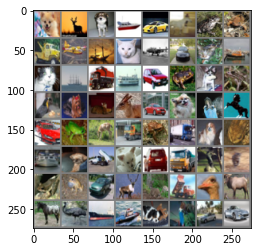

dog   deer  dog   ship  automobile horse frog  frog  truck airplane ship  cat   airplane automobile cat   ship  cat   ship  truck ship  automobile frog  dog   frog  bird  dog   cat   deer  automobile dog   bird  horse automobile frog  deer  truck frog  truck dog   frog  ship  dog   truck dog   automobile truck bird  cat   frog  frog  automobile deer  deer  truck bird  deer  horse bird  ship  ship  dog   bird  automobile automobile


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Selfdefined Network, CNN

In [4]:
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,15,kernel_size=3,padding=1)
        self.bn1 = nn.BatchNorm2d(15)
        self.conv2 = nn.Conv2d(15,75,kernel_size=3,padding=1)
        self.bn2 = nn.BatchNorm2d(75)
        self.conv3 = nn.Conv2d(75,125,kernel_size=3,padding=1)
        self.bn3 = nn.BatchNorm2d(125)
        self.conv4 = nn.Conv2d(125,150,kernel_size=3,padding=1)
        self.bn4 = nn.BatchNorm2d(150)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout()
        self.fc1 = nn.Linear(2400,500,bias=True)
        self.fc2 = nn.Linear(500,120,bias=True)
        self.fc3 = nn.Linear(120,num_classes,bias=True)
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def forward(self,x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0),-1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [5]:
net = Net()

if cuda is available use GPU 

In [6]:
import torch.optim as optim
if torch.cuda.is_available():
    net = net.cuda()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001, momentum= 0.9)


In [7]:
ls=[]
val_los = []
acc = []
val_acc = []
lr_list = []

# Training 80 Epoches

In [8]:
epochs = 80
net.train()
for i in range(epochs):
    iteration = 0
    run_loss = 0.0
    run_acc = 0.0
    for imgs,labels in trainloader:
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        net.zero_grad()
        outs = net(imgs)
        run_acc += labels.eq(torch.argmax(outs,axis=1)).float().mean().item()
        loss = loss_fn(outs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        iteration+=1
        run_loss += loss.item()
        '''if iteration % 100 == 99:
            print(f'[{i+1} ,{iteration+1}] loss: {run_loss/100:.3f}')
            ls.append(run_loss/100)
            run_loss = 0.0'''
    lr = optimizer.state_dict()['param_groups'][0]['lr']
    print(f'{i+1} epochs loss: {run_loss/iteration:.3f}, acc: {run_acc/iteration:.3f}, lr: {lr:.3f}')
    ls.append(run_loss/iteration)
    acc.append(run_acc/iteration)
    val_run_los = 0.0
    val_run_acc = 0.0
    iteration = 0
    with torch.no_grad():
        for j,data in enumerate(testloader):
            images, labels = data
        # calculate outputs by running images through the network
            if torch.cuda.is_available():
                outputs = net(images.cuda())
                labels = labels.cuda()
            val_run_acc += labels.eq(torch.argmax(outputs,axis=1)).float().mean().item()
            loss = loss_fn(outputs,labels)
            iteration+=1
            val_run_los += loss.item()
            '''if iteration % 25 == 24:
                print(f'[{i+1} ,{iteration+1}] val_loss: {val_run_los/25:.3f}')
                val_los.append(val_run_los/25)
                val_run_los = 0.0'''
        print(f'{i+1} epochs val_loss: {val_run_los/iteration:.3f}, val_acc: {val_run_acc/iteration:.3f}')
        val_los.append(val_run_los/iteration)
        val_acc.append(val_run_acc/iteration)
print('finshed')

1 epochs loss: 1.965, acc: 0.257, lr: 0.001
1 epochs val_loss: 1.707, val_acc: 0.351
2 epochs loss: 1.612, acc: 0.396, lr: 0.001
2 epochs val_loss: 1.503, val_acc: 0.440
3 epochs loss: 1.441, acc: 0.471, lr: 0.001
3 epochs val_loss: 1.370, val_acc: 0.498
4 epochs loss: 1.323, acc: 0.521, lr: 0.001
4 epochs val_loss: 1.264, val_acc: 0.534
5 epochs loss: 1.240, acc: 0.552, lr: 0.001
5 epochs val_loss: 1.223, val_acc: 0.560
6 epochs loss: 1.172, acc: 0.580, lr: 0.001
6 epochs val_loss: 1.159, val_acc: 0.586
7 epochs loss: 1.117, acc: 0.603, lr: 0.001
7 epochs val_loss: 1.110, val_acc: 0.603
8 epochs loss: 1.073, acc: 0.619, lr: 0.001
8 epochs val_loss: 1.078, val_acc: 0.612
9 epochs loss: 1.035, acc: 0.636, lr: 0.001
9 epochs val_loss: 1.066, val_acc: 0.629
10 epochs loss: 0.993, acc: 0.648, lr: 0.001
10 epochs val_loss: 1.037, val_acc: 0.637
11 epochs loss: 0.963, acc: 0.661, lr: 0.001
11 epochs val_loss: 1.026, val_acc: 0.643
12 epochs loss: 0.933, acc: 0.673, lr: 0.001
12 epochs val_lo

# Visual training log

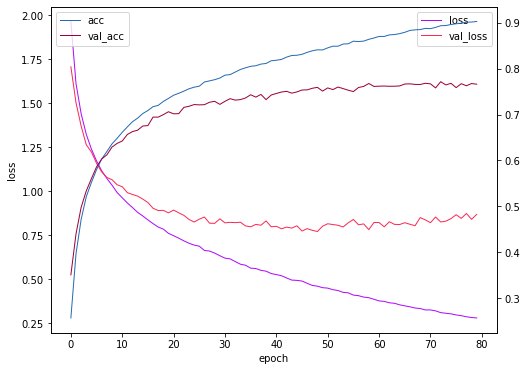

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ls,c='#ad0afd',linewidth='1',label='loss')
#plt.legend(['train_loss'],loc=(0.8,0.9))
plt.plot(val_los,c='#fa2a55',linewidth='1',label='val_loss')
#plt.legend(['val_loss'],loc=(0.8,0.8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.twinx()
plt.plot(acc,c='#276ab3',linewidth='1',label='acc')
plt.plot(val_acc,c='#9e003a',linewidth='1',label='val_acc')
plt.legend(loc=2)
plt.show()

# Model evaluation

In [96]:
correct = 0
total = 0
#net.cuda()
# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
net = net.cuda()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the test images: {100 * correct / total} %')


Accuracy of the network on the test images: 81.24 %


In [11]:
evalloader = torch.utils.data.DataLoader(testset, shuffle=True, batch_size=9,num_workers=10)

In [12]:
def imformat(imgs):
    if imgs.is_cuda:
        imgs = imgs.cpu()
    imgs = np.transpose(imgs.numpy(),(1,2,0))
    imgs = imgs*np.array([0.229, 0.224, 0.225])+np.array([0.485, 0.456, 0.406])
    imgs = np.clip(imgs,0,1)
    return imgs

In [13]:
itereval = iter(evalloader)

# Reasoning using models

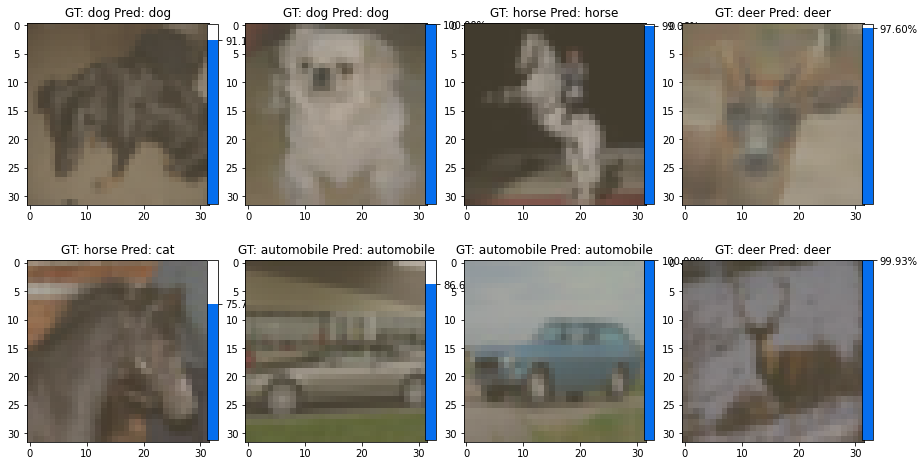

In [72]:
imgs,labels = itereval.next()
if torch.cuda.is_available():
    imgs = imgs.cuda()
    labels = labels.cuda()
outs = net(imgs)
prab = nn.Softmax(dim=1)(outs)
fig = plt.figure(figsize=(15,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    gt = classes[labels[i]]
    pred = classes[torch.argmax(outs,axis=1)[i]]
    idx = torch.argmax(outs,axis=1)[i].item()
    plt.imshow(imformat(imgs[i]))
    plt.title(f'GT: {gt} Pred: {pred}')
    ax = fig.add_axes([.292+(i%4)*0.202, 0.551-(i//4)*0.410, 0.010, 0.313])
    tick_locator = ticker.MaxNLocator(nbins=1)
    cmap = mpl.colors.ListedColormap(['#056eee','#fdfdfe'])
    norm = mpl.colors.BoundaryNorm([0, prab[i][idx].item(), 1], cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                     norm=norm,
                                     spacing='proportional',
                                     orientation='vertical')
    cb.locator = tick_locator
    cb.set_ticks([prab[i][idx].item()])
    cb.set_ticklabels([f'{(prab[i][idx].item()*100):.2f}%'])
    cb.update_ticks()
plt.show()